# Tutoriel Régression

## Problématique étudiée

La problématique étudiée est le cas avec le dataset california-housing. L'objectif de ce cas est d'estimer le prix d'un bien à partir des paramètres d'entrée donnés dans le dataset.

Il s'agit donc d'un cas de **machine learning supervisé**, et plus spécifiquement d'un cas de **régression**.

Ce notebook va vous guider à travers ce cas concret de classification, et va utiliser un modèle particulier de machine learning pour réaliser cette tâche : la *régression*. Les parties suivantes sont dédiées à l'implémentation de ce modèle grâce à l'utilisation de la librairie scikit-learn.

## Code

### Importation des différentes librairies 

In [23]:
from sklearn import datasets, metrics
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

### Importation du dataset 

La première étape est d'importer le dataset et de voir de quoi il est constitué. Ici on importe le dataset california-houses.

In [24]:
# Import the california_housing dataset
ch = fetch_california_housing(as_frame=True)

In [25]:
# Dataset description
# on peut utiliser .frame pour avoir le dataset correctement présenté 
ch.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [26]:
print(ch.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

On voit grâce à la description détaillée qu'il s'agit d'un dataset de 20 640 instances, sans données manquantes. Le set contient les données à tester mais aussi les données de "target" afin de vérifier nos résultats. 

Pour les 20 640 instances, il y a à chaques fois 8 variables : 

-"MedInc" : correspond au revenu médian des habitants du bloc d'appartements

-"HouseAge" : est l'age médian des habitants du bloc

-"AveRooms" : nombre moyen de pièces par foyers

-"AveBedrms" : nombre moyen de chambres par foyers

-"Population" : la population par bloc d'appartements

-"AveOccup" : le nombre moyen d'occupants par foyers     

-"Latitude" : la latitude

-"Longitude" : la longitude

-et enfin la "median house value", c'est notre valeur d'étalonnage. Elle est notée en centaines de millier de ($100,000).

<!-- Essayons de trouver quelles données sont corrélées les unes aux autres fin de simplifier notre future modèle de régression :  -->

### Choix des données

Pour faire une bonne régression linéaire, il est crucial de bien choisir ses variables,
c'est à dire de prendre des variables faiblement corrélées les unes au autres afin qu'elles ne s'allimentent pas entre elles. 
Nous allons donc faire une heatmap dans un premier temps. 

[Text(0.5, 1.0, 'correlation matrice california house dataset')]

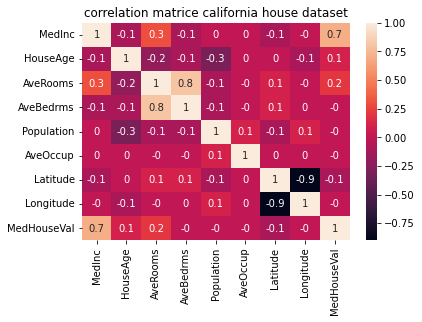

In [36]:
matrice_corr = ch.frame.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True).set(title="correlation matrice california house dataset")

Il faut sélectionner des variables qui sont faiblement corrélées entre elles et fortement corrélées avec la variable cible.
Ici la seule variable fortement corrélée est MedInc. Ce n'est pas l'usage mais nous allons faire une régression linéaire 
avec seulement ce paramètre. 

### Phase d'apprentissage du modèle

La première étape lors de l'utilisation d'une méthode d'apprentissage supervisée, c'est l'apprentissage. Dans cette étape, nous allons construire notre modèle en lui donnant un certain nombre d'exemples depuis notre base de données. La règle de base lors de cette étape est de séparer la base de données en deux : une partie pour l'apprentissage et une partie pour le test. Ceci afin de ne pas montrer lors de la phase de test des exemples de chiffres qui auraient servis lors de la phase d'apprentissage, car alors le test serait biaisé.

Mais pour pouvoir apprendre un modèle, ce dernier a besoin de *features*, c'est-à-dire des nombres en entrée, servant à décrire nos images dans un *langage* compris par la machine.

In [28]:
#on utilise seulement 1 variables explicative
# le jeux données et nommé data donc pour l'appeller je demande .data 
# la valeur target est nomée tagret et n'est pas dans les 'data', pour l'appeler je fais "target"
X = ch.data['MedInc']
Y = ch.target

# en python, un tableau doit avoir une dimension, il faut donc lui attribuer un nouvel axe car un enchênement de lignes 
# n'est pas forcément une colone 
X=X[:,np.newaxis]
Y=Y[:,np.newaxis]

Y.shape

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_6864\1228757043.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=X[:,np.newaxis]
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_6864\1228757043.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Y=Y[:,np.newaxis]


(20640, 1)

Puis, nous divisons notre jeu de données d'entrée en deux sous-ensembles, afin de constituer nos jeux de données d'apprentissage (constitué ici de 70 % des données de départ), et de test (30 % des données de départ).

In [29]:
# Split data with 70% to train and 30% to test
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(14448, 1)
(6192, 1)
(14448, 1)
(6192, 1)


Puis nous choisissons le modèle à mettre en place, nous l'apprenons, et nous le testons dans la foulée :

In [30]:
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression()

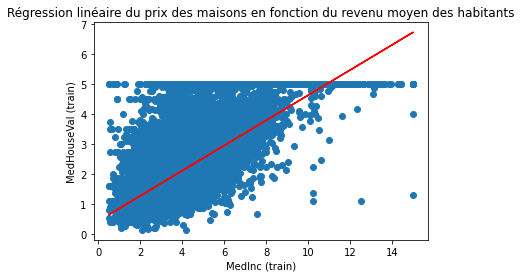

In [34]:
y_predicted = lmodellineaire.predict(X_train)



# tracer le graphique
plt.scatter(X_train,Y_train)
# régression
plt.plot(X_train, y_predicted, color='r' )
plt.xlabel("MedInc (train)")
plt.ylabel("MedHouseVal (train)")
plt.title ("Régression linéaire du prix des maisons en fonction du revenu moyen des habitants")
plt.show()

Sur ce schéma, on voit que beaucoup de points sont au dessus de la droite et que quelques points sont en dessous avec une dispersion forte. On notre aussi que le prix des maisons est globallement plafoné à 5000 000 dollars globalement. Cependant,  la graduation continue, il serait donc intéressant de regarder si il n'y a pas des maisons avec un prix plus élevé et si celui-ci est cohérent. 

### Vérification des résultats pour valider le modèle 

Une étape essentielle après l'apprentissage et le test d'un modèle de machine learning est l'analyse de ses performances afin de valider s'il fonctionne ou non. Pour ce faire, nous utilisons la RMSE et le R2.

In [ ]:
# Evaluation du training set

y_train_predict = lmodellineaire.predict(X_train)
rmse = (mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

Le RMSE ou *Root Mean Squared Error* s’exprime dans la même unité que la variable à prédire. Plus elle est élevée, moins le modèle est performant. Ici le modèle est précis à envirron 0.83, c'est à dire qu'il est précis à 83 000 dollars près.Il serait intéressant de le tester avec plus de variables et de voir si la précision s'améliore. 

Le R2 ou *coefficient de determination* est la somme des distances au carré entre chaque observation et la
droite de régression (autrement dit, la valeur prédite). Plus il est proche de **1**, meilleure est la prédiction.
Ici les résultats obtenus sont sensiblement identiques mais assez bas, il serait judicieux de rajouter des variables d'apprentissage. 
Il est encorageant que le R2 de test soit légerement supérieur mais sensiblement similaire au R2 d'apprentissage.

#### Ceci conclut notre tutoriel, et sentez-vous libre de jouer avec les paramètres du modèle pour mieux le comprendre !